# In class exercise...
* MI is biased in that small sample sizes lead to inaccurate estimates of PDFs, and that can sometimes lead to negative MI values (which should never happen in theory). 
* A common, and simple, approach, is to compute MI with shuffled condition labels (like randomization tests that we did many weeks back) and then subtract the shuffled MI from the actual MI. 

## Imports

In [109]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## First set up two arrays of data...make them correlated to some degree so that there is a reasonably high MI...

In [132]:
N = 100   # number of data points
x = np.round(np.random.rand(N))
y = x.copy() #making y a copy of x


print (y[:(int(N/10))]) #Changing the first 10 percent of y with random numbers
y[:10] = np.round(np.random.rand((int(N/10))))

#y = np.round(np.random.rand(N))
#y = x, endre 10% av dataene til random 0 eller 1
print (x)
print (y)



[1. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
[1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 1.]
[1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 1.]


## Then compute the MI between the arrays. Can do two discrete arrays for simplicity, and import the entropy and conditional entropy functions from the tutorial.

In [133]:
Hx = entropy(x=x)
Hxy = condEntropy(x=x,y=y)
print('MI is: ', Hx-Hxy)

MI is:  0.6701117412680038


## Now repeat the above operations, but shuffle the data arrays and repeat the analysis many times (~500-1000 times). Plot the distribution of MI values that you get.

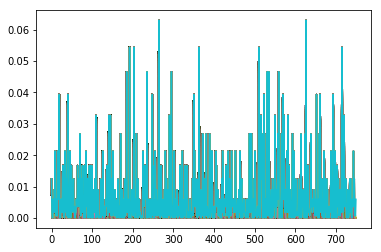

In [144]:
import random

repetitions = 750
MI = np.zeros(repetitions)

    

for i in range(0,repetitions):
    random.shuffle (x)
    random.shuffle (y)
    Hx = entropy (x=x)
    Hxy = condEntropy(x=x,y=y)
    MI[i] = Hx - Hxy

    plt.plot (MI)
    plt.ylabel = "MI"
    plt.xlabel = "repetitions"


#np.random.shuffle


## Now subtract the mean of the shuffled MI values from your 'real' MI value...this will help correct for any bias that is introduced by a limited sample size